<a href="https://colab.research.google.com/github/gisrodri/My-Studies-/blob/master/Desafio_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Desafio prático - Classificação de dados com a competição do Titanic**

# New Section

![](https://media.giphy.com/media/Uj3SeuVfg2oCs/giphy.gif)

O problema de classificação que iremos resolver é o descrito na competição do Kaggle [Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic). Esse desafio é muito famoso e utilizado por quem está começando na área de Data Science e/ou a participar de competições pelo Kaggle (apesar de ser um assunto #badvibes).

![](https://media.giphy.com/media/4ryp9Ihw0BEyc/giphy.gif)

O objetivo da competição é simples: **criar um modelo utilizando Machine Learning para predizer se um passageiro do Titanic sobreviveu ou não ao naufrágio**.

## **Bibliotecas auxiliares**

Aqui nós vamos importar as algumas das bibliotecas necessárias para fazer a análise e visualização dos dados (lembram dessas aulas?)

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### **Conhecendo nossos conjuntos de dados**

In [0]:
train = pd.read_csv('https://raw.githubusercontent.com/WoMakersCode/data-science-bootcamp/master/4.0%20Modelos%20de%20classifica%C3%A7%C3%A3o/data/train.csv')
submission = pd.read_csv('https://raw.githubusercontent.com/WoMakersCode/data-science-bootcamp/master/4.0%20Modelos%20de%20classifica%C3%A7%C3%A3o/data/test.csv')

Vamos ver a carinha dos nossos conjuntos de dados?

In [3]:
#TODO
train.head(2)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [4]:
#TODO
submission.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


Na tabela abaixo podemos conferir o significado de cada um dos atributos presentes no conjunto de dados:

|Atributo| Descrição|
|--------|----------|
|**PassengerId**| id do passageiro|
|**Pclass**| classe do ticket|
|**Name**|nome do passageiro|
|**Sex**|gênero do passageiro|
|**Age**|idade do passageiro (em anos)|
|**SibSp**|Quantidade de irmãos/cônjuge que também embarcaram no Titanic|
|**Parch**|Quantidade de pais/filhos que também embarcaram no Titanic|
|**Ticket**|Número do ticket do passageiro|
|**Fare**|Tarifa paga pelo passageiro|
|**Cabin**|Número da cabine|
|**Embarked**|Porto de embarque|
|**Survived**|Indica se o passageiro sobreviveu ou não ao naufrágio (é o nosso target)|


Vamos verificar o tamanho dos conjuntos de treinamento e teste?

In [5]:
#TODO 
train.shape

(891, 12)

In [6]:
#TODO
submission.shape


(418, 11)

Vamos ver os tipos dos dados do conjunto de treinamento (também podemos verificar a quantidade de valores faltantes para cada atributo)?

In [7]:
#TODO
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### **Remoção de features irrelevantes**

Algumas features presentes em nosso conjunto de dados não são úteis para nos ajudar a predizer se um passageiro sobreviveu ou não ao naufrágio do Titanic. Essas features geralmente estão relacionadas a identificadores únicos de um indivíduo e, portanto, não ajudam na generalização do modelo.

Que features seriam essas?

In [0]:
#Verificar as features únicas no dataset
def count_unique(df):
  print("Quantidade de valores únicos para cada feature no conjunto de treinamento")
  for i in df.columns:
    print(f"{i}: {df[i].nunique()}")

In [10]:
count_unique(train)

Quantidade de valores únicos para cada feature no conjunto de treinamento
PassengerId: 891
Survived: 2
Pclass: 3
Name: 891
Sex: 2
Age: 88
SibSp: 7
Parch: 7
Ticket: 681
Fare: 248
Cabin: 147
Embarked: 3


Podemos remover esses casos que não fazem sentido do nosso conjunto de dados:

In [0]:
#TODO
#Fazendo uma array retirando as features irrelevantes

columns = ['PassengerId', 'Name', 'Ticket', 'Cabin']

In [0]:
#TODO 
#Retirando as features do dataset
train = train.drop(columns, axis=1)

In [13]:
#TODO
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### **Análise exploratória (Exploratory Data Analysis - EDA)**

Antes de treinarmos nosso modelo, precisamos fazer uma análise dos nossos dados para entender o nosso conjunto de treinamento e verificar quais atributos fazem sentido e verificar se alguma transformação será necessária.

### Survived (Sobrevivência do passageiro)

Primeiramente, é interessante olharmos a proporção do nosso target no nosso conjunto de dados:

In [14]:
#TODO
#verificar o targert contado
train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

Os passageiros com o target igual a 0 são aqueles que não sobreviveram ao naufrágio, enquanto que os que sobreviveram estão com o valor 1 no target.

Text(0, 0.5, 'Contagem')

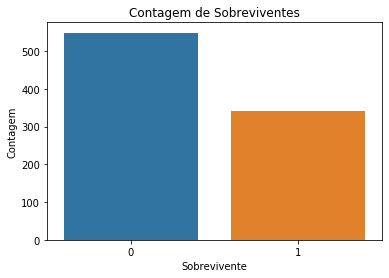

In [15]:
#TODO
#Plotando a quantidade de Survived 
x = sns.countplot(x="Survived", data=train)
plt.title('Contagem de Sobreviventes')
plt.xlabel('Sobrevivente')
plt.ylabel('Contagem')

In [16]:
print(f"Considerando nosso conjunto de treinamento {train.Survived.value_counts()[0]/train.shape[0]*100:.2f}% dos passageiros não sobreviveram ao naufrágio :(")

Considerando nosso conjunto de treinamento 61.62% dos passageiros não sobreviveram ao naufrágio :(


###  Pclass (classe do ticket do passageiro) 	 	 	 	 	 	

 De acordo com a descrição das features no Kaggle, os valores para esse atributo têm os seguintes significados:
 - 1 - Classe alta
 - 2 - Classe média
 - 3 - Classe baixa


Text(0, 0.5, 'Contagem')

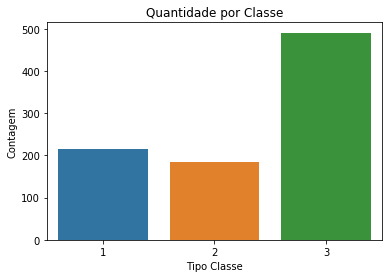

In [17]:
#TODO
ax = sns.countplot(x="Pclass", data=train)
plt.title('Quantidade por Classe')
plt.xlabel('Tipo Classe')
plt.ylabel('Contagem')


Text(0, 0.5, 'Contagem')

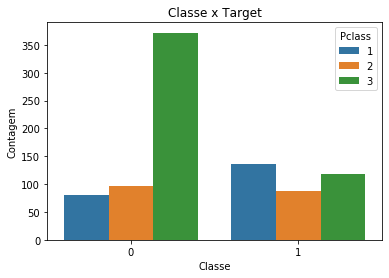

In [18]:
sns.countplot(data=train, x='Survived', hue="Pclass", )
plt.title('Classe x Target')
plt.xlabel('Classe')
plt.ylabel('Contagem')

Podemos agora comparar a classe dos passageiros com relação ao nosso target para verificar se ela é relevante:

In [19]:
#TODO
train[['Pclass', 'Survived']].groupby(['Pclass']).mean()*100

,Survived
Pclass,
1,62.962963
2,47.282609
3,24.236253


In [0]:
#TODO


###  Sex (gênero do passageiro) 	 	 	 	

Text(0, 0.5, 'Contagem')

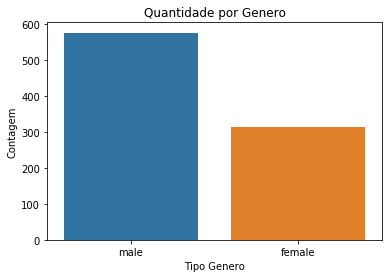

In [20]:
#TODO
ax = sns.countplot(x="Sex", data=train)
plt.title('Quantidade por Genero')
plt.xlabel('Tipo Genero')
plt.ylabel('Contagem')


Text(0, 0.5, 'Contagem')

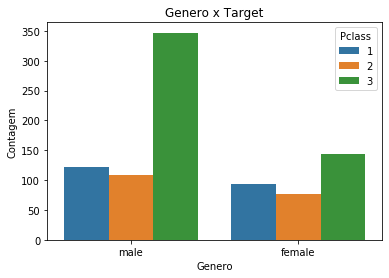

In [21]:
#TODO
sns.countplot(data=train, x='Sex', hue="Pclass", )
plt.title('Genero x Target')
plt.xlabel('Genero')
plt.ylabel('Contagem')

In [22]:
# proporção de sobrevivência por gênero
#TODO
train[['Pclass', 'Sex']].groupby(['Sex']).mean()*100

,Pclass
Sex,
female,215.923567
male,238.994801


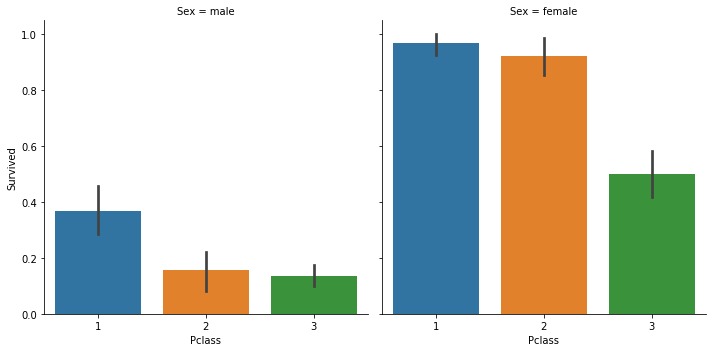

In [23]:
#TODO
sns.catplot(x='Pclass', y='Survived', col='Sex',
            data=train, kind='bar');

###  Age (idade do passageiro) 	 	

In [24]:
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

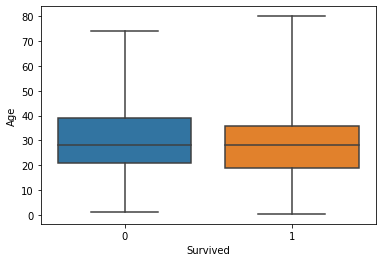

In [25]:
#TODO
sns.boxplot(x="Survived", y="Age", data=train,
            whis="range")

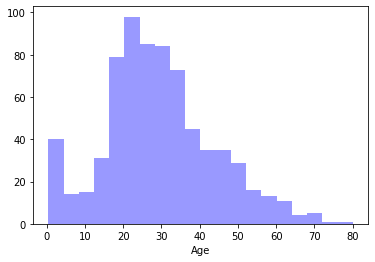

In [26]:
#TODO
sns.distplot(train.loc[train.Age.isnull()==False]['Age'], kde=False, color="b")

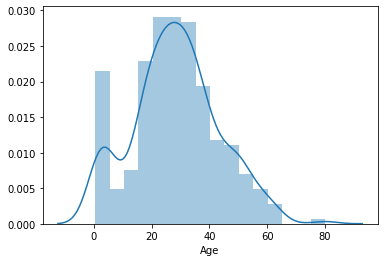

In [27]:
#TODO
sns.distplot(train.loc[(train.Survived == 1) & (train.Age.isnull()==False), 'Age'],
                        hist=True, label='Sobreviveu')
                        

### **Tarefinha pra casa**

![](https://media.giphy.com/media/geONXs3YIr0Aw/giphy.gif)

Por conta do tempo, não vamos conseguir fazer a análise de todas as features :(

Então sugerimos que vocês façam a análise das features que ficaram faltando:
- Fare
- Embarked
- SibSp
- Parch

Algumas ideias de análises que podem ser feitas:
- Comparar a tarifa paga pelo passageiro dependendo de sua classe
- Analisar se o tamanho da família influenciou na sobrevivência (o tamanho da família pode ser dado pela soma das features `SibSp` e `Parch`)
- Analisar se há diferença da tarifa paga dependendo do porto de embarque
- Verificar a correlação entre as features utilizando um heatmap

## Feature Engineering

Alguns algoritmos exigem que algumas transformações sejam feitas para que possamos treinar o modelo...

![alt text](http://giphygifs.s3.amazonaws.com/media/720g7C1jz13wI/giphy.gif)

Algumas dessas transformações são:
- Converter features categóricas em numéricas
- Fazer normalização ou estandardização dos dados
- Fazer o tratamento de valores faltantes
- Etc...

Como exemplo, vamos fazer a conversão de features categóricas e o tratamento de valores faltantes:

#### **Tratamento de valores faltantes (missing values)**

Como pudemos observar nas descrições acima, há casos de passageiros sem informação sobre suas idades. Podemos substituir esses valores faltantes pela mediana das idades:

In [0]:
median_age = train['Age'].median()

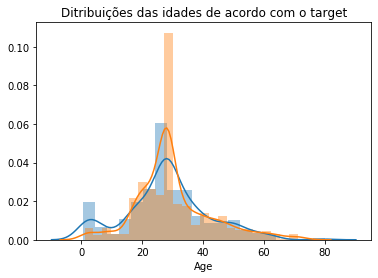

In [29]:
#TODO
train.loc[train['Age'].isnull(), 'Age'] = median_age

sns.distplot(train.loc[(train.Survived == 1) & (train.Age.isnull()==False), 'Age'],hist=True, label='Sobreviveu')
sns.distplot(train.loc[(train.Survived == 0) & (train.Age.isnull()==False), 'Age'],hist=True, label='Não Sobreviveu')
_= plt.title('Ditribuições das idades de acordo com o target')

Que outras abordagens poderíamos adotar para realizar essa substituição de valores faltantes?

#### **Conversão de features categóricas**

A feature que indica o gênero dos passageiros é categórica. Iremos transformá-la em uma feature numérica. Há diversas abordagens para realizar essa transformação:
- Uma delas é utilizando o [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)

- E outra delas é fazendo o [One-hot encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)

Por exemplo, se tivéssemos a seguinte feature:

|renda|
|-----|
|alta |
|baixa|
|media|
|alta |

Com o LabelEncoder, teríamos o seguinte resultado:

|renda|
|-----|
|0 |
|1|
|2|
|0 |

Já com o One-hot enconding teríamos o seguinte resultado:

|renda_alta|renda_baixa|renda_media|
|-----|----|----|
|1 |0|0|
|0|1|0|
|0|0|1|
|1 |0|0|

No nosso caso, vamos utilizar o LabelEncoder:


In [0]:
from sklearn.preprocessing import LabelEncoder

#TODO
#substitui string 'Genero' por 

encoder = LabelEncoder()
train['Sex'] = encoder.fit_transform(train['Sex'])

In [31]:
#TODO
# maior quantidade homem
train.Sex.value_counts()

1    577
0    314
Name: Sex, dtype: int64

### **Tarefinha pra casa**

![](https://media.giphy.com/media/geONXs3YIr0Aw/giphy.gif)

**Que outras transformaçõs poderíamos fazer em nosso conjunto de dados?**
- Criar categorias para a idade (criança, adulto, idoso, por exemplo)
- Criar uma feature para indicar o tamanho da família (soma das features `SibSp` e `Parch`)
- [Aqui](https://triangleinequality.wordpress.com/2013/09/08/basic-feature-engineering-with-the-titanic-data/) também algumas ideias de feature engineering para esse desafio

Tentem fazer algumas dessas transformações ou fazer outras que vocês acreditam que façam sentido :D 

## Treinamento
Agora que nosso conjunto de treinamento está bonitinho, vamos treinar o nosso primeiro modelo \o/

Antes de treinar o modelo, precisamos separar as features do nosso target (**tomar muito cuidado para não treinar o modelo com ele!!!**). 

Além disso, nessa primeira versão, vamos utilizar somente as 3 features que analisamos na aula:

In [0]:
#TODO

# nossas features
x = train[['Age', 'Sex', 'Pclass']]

# nosso target
y = train['Survived']

In [33]:
x.head()

,Age,Sex,Pclass
0,22.0,1,3
1,38.0,0,1
2,26.0,0,3
3,35.0,0,1
4,35.0,1,3


In [34]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

Uma outra coisa que precisamos fazer antes de treinar o modelo é separar o nosso conjunto de dados entre o **conjunto de treinamento** e o **conjunto de teste**. No nosso caso, vamos usar 75% do conjunto para treinamento e o restante para teste:

In [0]:
from sklearn.model_selection import train_test_split

# Separando os dados em treinamento e teste
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size=0.25, random_state=42)


In [36]:
#TODO
x_train.shape

(668, 3)

In [37]:
#TODO
x_test.shape

(223, 3)


Esse nosso primeiro modelo será uma Árvore de decisão. O scikit-learn já contém uma implementação dela [aqui](https://scikit-learn.org/stable/modules/tree.html).



In [38]:
from sklearn.tree import DecisionTreeClassifier

#TODO 

# Instanciando o classificador
model = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Treinamento do modelo
model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

**UHULLLLL! Temos nosso primeiro modelo de classificação \o/**

![](https://media.giphy.com/media/OU1marLMNNtnO/giphy.gif)

Vamos ver a carinha dela (esse código para visualização da árvore nós encontramos [aqui](https://www.kaggle.com/jlawman/complete-beginner-your-first-titanic-submission))? :)

In [0]:
# arquivo de texto que armazena a estrutura da nossa árvore de decisão
from sklearn.tree import export_graphviz
export_graphviz(model,out_file='titanic_tree.dot',feature_names=['Age', 'Sex', 'Pclass'], rounded=True,filled=True,class_names=['Não Sobreviveu','Sobreviveu'])


In [0]:
!dot -Tpng titanic_tree.dot -o titanic_tree.png

Após converter o arquivo de texto, podemos visualizar a árvore abaixo. As cores ajudam a identificar a classificação dada pelo modelo:

- Nós ou folhas em azul significam que a nossa árvore de decisão acredita que o passageiro **SOBREVIVEU**
- Já nos nós e folhas em laranja, a árvore acha que o passageiro **NÃO SOBREVIVEU**

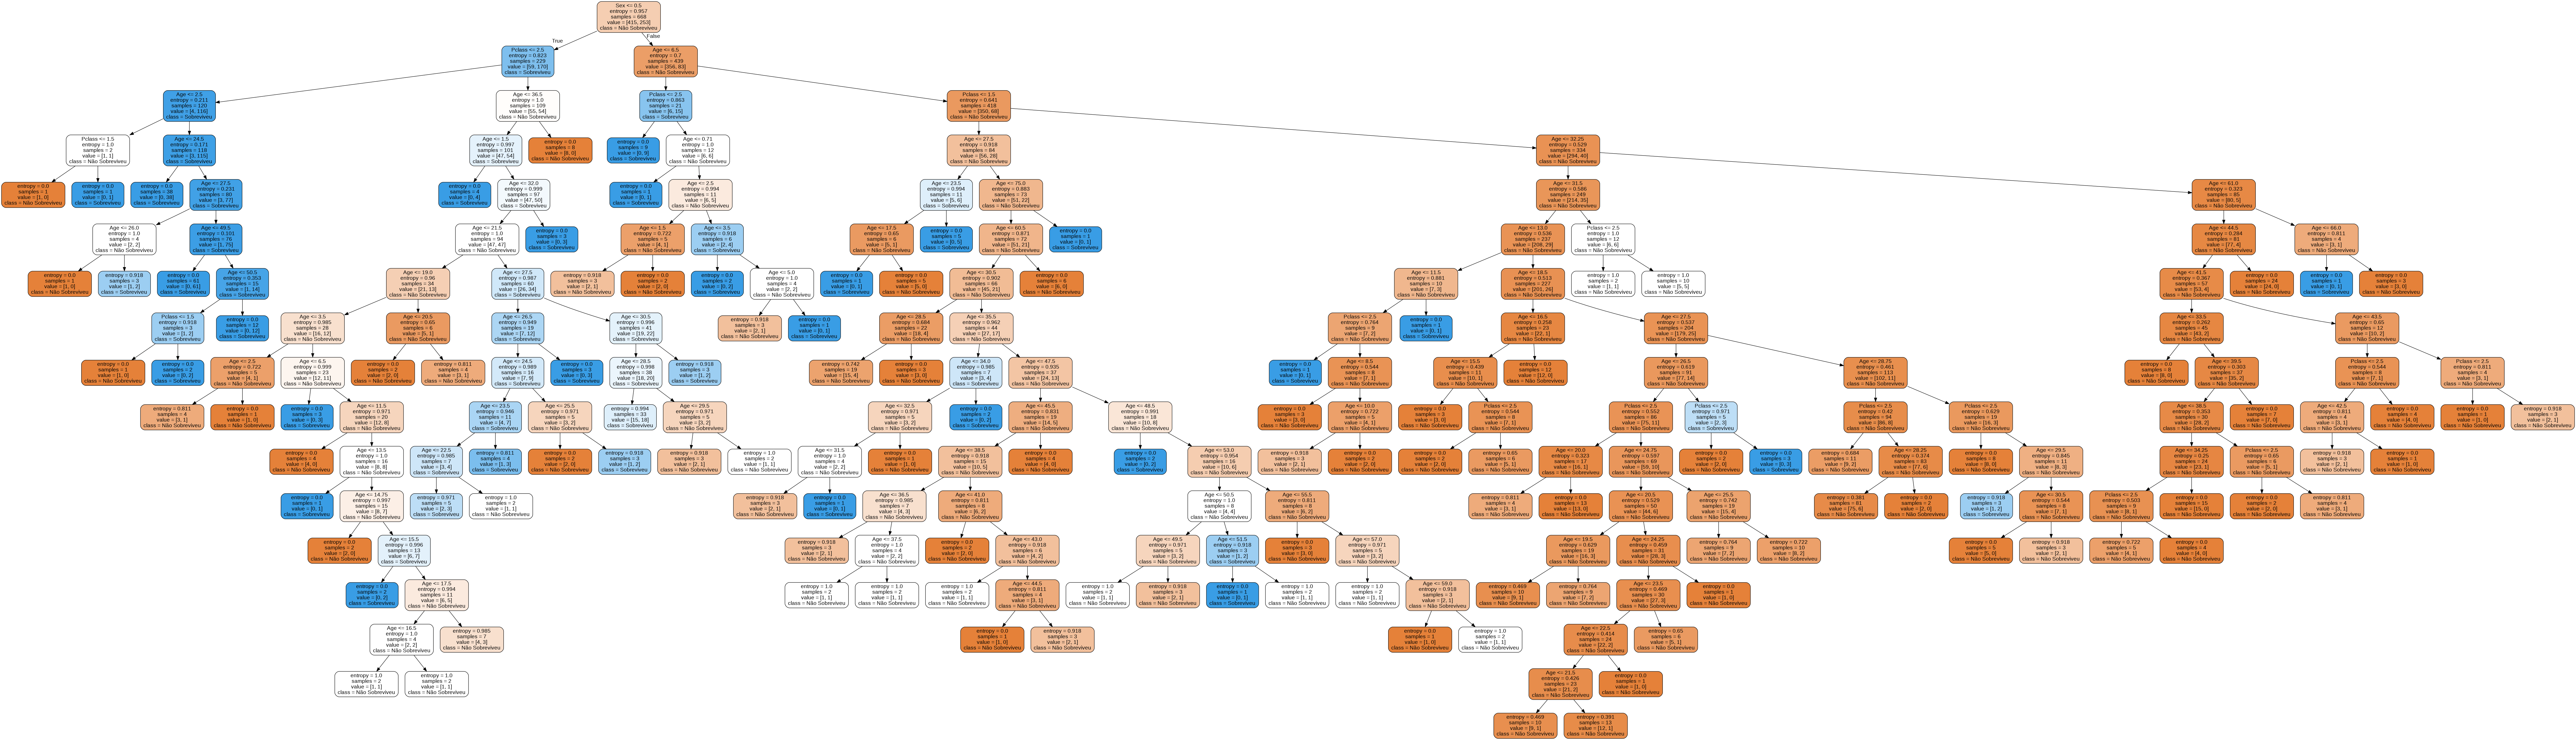

In [41]:
from IPython.core.display import Image, display
display(Image('titanic_tree.png', width=1900, unconfined=True))

**O que vocês acharam dessa árvore?**

## Avaliando nosso modelo

Agora precisamos avaliar se o modelo está bom ou não!

Para isso, precisamos utilizá-lo para realizar as predições para nosso conjunto de teste:

In [0]:
#TODO 
y_pred = model.predict(x_test)

In [43]:
y_pred

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0])

Como a métrica de avaliação do Kaggle é a acurácia, vamos utilizá-la primeiro:

In [0]:
from sklearn.metrics import accuracy_score

In [45]:
#TODO
accuracy_score(y_test, y_pred)

0.7623318385650224

Outra avaliação que poderíamos fazer é utilizando uma matriz de confusão:

In [0]:
from sklearn.metrics import confusion_matrix
import itertools

In [0]:
# plota a matriz de confusão. Código retirado da documentação do próprio Sklearn
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Matriz de confusão',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    #plt.ylim(0.5, 0.5)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.ylim(1.5, -0.5) 

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Classe real')
    plt.xlabel('Classe prevista')
    plt.tight_layout()

In [0]:
#TODO
cnf_matrix = confusion_matrix (y_test, y_pred)

In [49]:
cnf_matrix

array([[111,  23],
       [ 30,  59]])

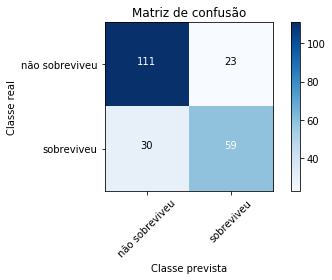

In [50]:
plot_confusion_matrix(cnf_matrix, classes = ['não sobreviveu', 'sobreviveu'])

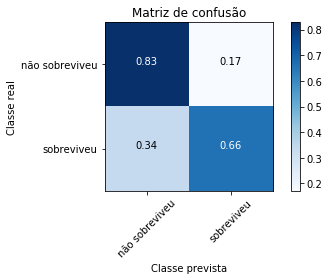

In [51]:
plot_confusion_matrix(cnf_matrix, normalize=True, classes = ['não sobreviveu', 'sobreviveu'])
# o eixo y está confuso no modelo

## Predição


Agora que nosso modelo foi avaliado, vamos fazer as predições para o conjunto sem o target e fazer a [submissão para o Kaggle](https://www.kaggle.com/c/titanic/submit)? :D

![alt text](https://media.giphy.com/media/l4JySAWfMaY7w88sU/giphy.gif)

Antes de fazer as predições, precisamos fazer as mesmas transformações que fizemos no conjunto de treinamento durante a etapa de feature engineering:

In [0]:
# substituímos os valores faltantes pela mediana da idade do conjunto de treinamento
#TODO
submission.loc[submission['Age'].isnull(), 'Age'] = median_age

In [0]:
# utilizamos o encoder que foi criado com base no conjunto de treinamento
#TODO
submission['Sex'] = encoder.transform(submission['Sex'])

In [0]:
# realiza a predição para o conjunto de teste
#TODO
result = model.predict(submission[['Age', 'Sex', 'Pclass']])

Para a submissão no Kaggle, além da predição, precisamos fornecer também o ID do passageiro:

In [0]:
# transformar o array em um DataFrame para concatenarmos como ID
#TODO
results = pd.DataFrame(list(result), columns = ['Survived'])

In [61]:
#TODO
submission = pd.concat([submission['PassengerId'], results], axis=1)
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,1


In [0]:
#TODO
submission.to_csv('titanic_submission.csv', index=False)

In [66]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,1


Se observarmos o resultado da acurácia no conjunto de treinamento, tivemos uma certa diminuição na acurácia do conjunto de teste. Por que isso ocorre?

 ![](https://hackernoon.com/hn-images/1*SBUK2QEfCP-zvJmKm14wGQ.png)

  
No nosso caso, o modelo sofreu **overfitting**. Isso também explica a alta complexidade da árvore. No caso da nossa árvore, é necessário podá-la para que ela possa **generalizar** o problema.

## Próximos passos

Ainda podemos melhorar **MUITO** o nosso modelo :) 

O que podemos fazer?

- Como pudemos ver, nossa árvore está sofreu overfitting. Podemos mudar diversos parâmetros da nossa árvore para evitar que isso aconteça. Alguns parâmetros que podemos alterar:
  - **max_depth** (profundidade máxima da árvore) - podemos determinar um valor para que ela não se aprofunde demais
  - **min_samples_split** (número mínimo de exemplos para dividir um nó interno) - podemos aumentar o número (o mínimo *default* é 2) para diminuir o número de divisões
  - **min_samples_leaf** (número mínimo de exemplos para que um nó seja uma folha) - podemos aumentar o número (o mínimo *default* é 1) para diminuir o número de folhas
- Podemos realizar outras transformações na etapa de feature engineering ou criar novas features
- Também podemos treinar o modelo adicionando as outras features que não vimos nessa aula. Talvez elas possam ajudar na predição ;)
- Além disso, é interessante ver as outras métricas de avaliação para entendermos melhor o nosso modelo e como podemos melhorá-lo!

### **Tarefinha pra casa**

![](https://media.giphy.com/media/geONXs3YIr0Aw/giphy.gif)


Tentem fazer algumas (ou todas) as sugestões feitas nesse notebook e fazer a submissão das predições no Kaggle novamente!  

Na próxima aula vocês nos contam se a acurácia do modelo melhorou :D 

![](https://media.giphy.com/media/3o7budMRwZvNGJ3pyE/giphy.gif)